In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

def load_housing_data(housing_path='data'):
    train_csv_path = os.path.join(housing_path, "train.csv")
    test_csv_path = os.path.join(housing_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_housing_data()

In [3]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
num_att = list(train.select_dtypes([np.number]).columns)

# att = ['OverallQual', 'GrLivArea']

# to_remove = ['BsmtFinSF2', 'MoSold', '3SsnPorch', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF']
# for t in to_remove:
#     att.remove(t)
num_att.remove('Id')
num_att.remove('SalePrice')
print(num_att)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [5]:
train.info()
# train.select_dtypes(include=['object'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
cat_att = ['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 'Foundation', 
           'PavedDrive', 'SaleCondition']
# cat_att = ['Neighborhood', 'BldgType']
print(cat_att)

['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 'Foundation', 'PavedDrive', 'SaleCondition']


In [8]:
for a in num_att:
    median = train[a].median()
    train[a].fillna(median, inplace=True)
    
#     median = test[a].median()
    test[a].fillna(median, inplace=True)

In [9]:
train[num_att].info()
test[num_att].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [15]:
train[cat_att].info()
test[cat_att].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
Neighborhood     1460 non-null object
BldgType         1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Foundation       1460 non-null object
PavedDrive       1460 non-null object
SaleCondition    1460 non-null object
dtypes: object(8)
memory usage: 91.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
Neighborhood     1459 non-null object
BldgType         1459 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Foundation       1459 non-null object
PavedDrive       1459 non-null object
SaleCondition    1459 non-null object
dtypes: object(8)
memory usage: 91.3+ KB


In [11]:
train_y = train["SalePrice"].copy()
# train = train.drop("SalePrice", axis=1)
# train = train.drop("Id", axis=1)
# test = test.drop("Id", axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
train2 = train[num_att + cat_att]
train2.info()
test2 = test[num_att + cat_att]
test2.info()

merged_df = pd.concat([train2, test2])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
train_prepared = num_pipeline.fit_transform(train[num_att])
test_prepared  = num_pipeline.transform(test[num_att])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_att),
        ("cat", OneHotEncoder(), cat_att),
    ])

train_test_full_prepared = full_pipeline.fit_transform(merged_df)
train_full_prepared = full_pipeline.transform(train2)
test_full_prepared = full_pipeline.transform(test2)


In [18]:
print(train_prepared.shape)
print(test_prepared.shape)
print(train_full_prepared.shape)
print(test_full_prepared.shape)

(1460, 36)
(1459, 36)
(1460, 94)
(1459, 94)


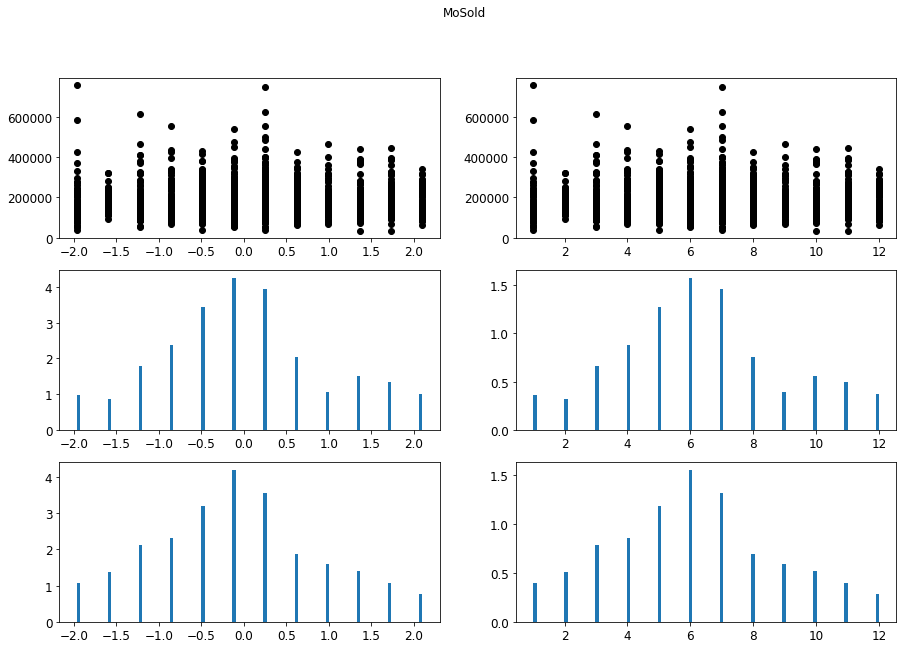

In [125]:
# train_prepared.plot(kind="scatter", x="SalePrice", y="1stFlrSF")
i = 34
# fig, (ax1, ax2), (ax3, ax4) = plt.subplots(2, 2, figsize=(15,10))
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
fig.suptitle(att[i])
ax1.plot(train_prepared[:,i], train_y, 'o', color='black')
ax2.plot(train[att[i]][:], train_y, 'o', color='black')

ax3.hist(train_prepared[:,i], density=True, bins=100)
ax4.hist(train[att[i]][:], density=True, bins=100)

ax5.hist(test_prepared[:,i], density=True, bins=100)
ax6.hist(test[att[i]][:], density=True, bins=100)

plt.show()

(array([0.02104297, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03156445, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21042966, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.220492  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.17702866,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.93503456, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.35635301, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

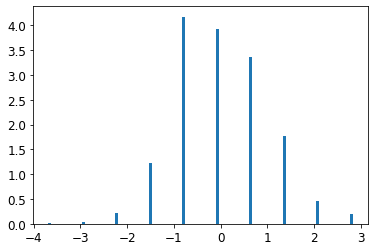

In [76]:
plt.hist(train_prepared[:,3], density=True, bins=100)

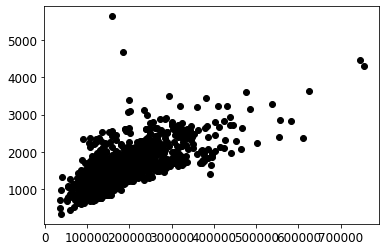

In [56]:
plt.plot(train_y, train[att[1]][:], 'o', color='black')

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

34328.09878667821

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train[num_att], train_y)

housing_predictions = forest_reg.predict(train[num_att])
forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11107.924941956435

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_full_prepared, train_y)

housing_predictions = forest_reg.predict(train_full_prepared)
forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11161.68830559312

In [21]:
y_pred = forest_reg.predict(test_full_prepared)
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})

In [25]:
y_pred = lin_reg.predict(test_full_prepared)
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})

In [22]:
sub.to_csv("data/submission_script06_rf_somemorecatatt.csv", index=False)

In [23]:
sub.shape

(1459, 2)